In [33]:
from google.colab import drive
drive.mount("/content/drive/")

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [66]:
#Library
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import seaborn as sns
from tensorflow.keras import Input
from keras.models import Model,load_model,Sequential
from keras.layers import Flatten ,Dense
from keras.datasets import mnist
#from keras.utils import np_utils
from keras import utils
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix


#Lấy bộ dữ liệu từ MNIST

In [56]:
#lấy data train và test trong bộ mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape)
print("Number of image for training: {}".format(len(x_train)))
print("Number of image for testing: {}".format(len(x_test)))

(60000, 28, 28)
Number of image for training: 60000
Number of image for testing: 10000


#Chia train set thành 2 tập train và val theo tỉ lệ 4:1

In [57]:
# Chia tập validation với tỉ lệ 4:1 với tập train
'''
x_train, y_train = x_train[:48000, :, :], y_train[:48000]
x_val, y_val = x_train[48000:60000, :, :], y_train[48000:60000]

print("Number of image for training: {}".format(len(x_train)))
print("Number of image for validating: {}".format(len(x_val)))
'''


'\nx_train, y_train = x_train[:48000, :, :], y_train[:48000]\nx_val, y_val = x_train[48000:60000, :, :], y_train[48000:60000]\n\nprint("Number of image for training: {}".format(len(x_train)))\nprint("Number of image for validating: {}".format(len(x_val))) \n'

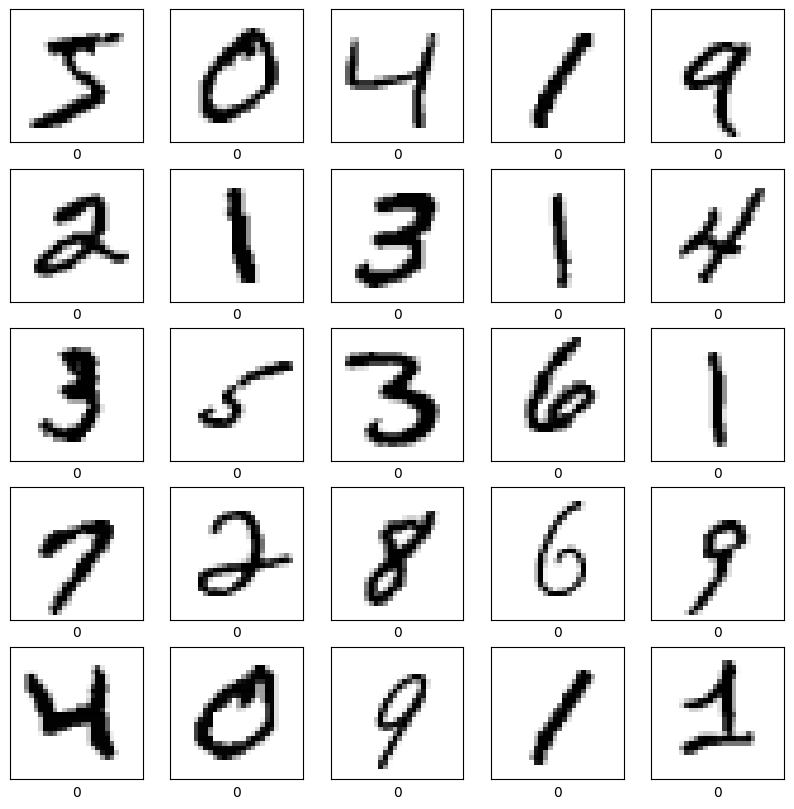

In [58]:
plt.figure(figsize =(10,10))
#Hiển thị 25 sample đầu tiên trong bộ Mnist
for i in range (25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap = plt.cm.binary)
    plt.xlabel(np.argmax(y_train[i]))
plt.show()


###Data Processing

In [60]:
#chuyển shape của các array : ban đầu (60000, 28, 28) chuyển thành (60000, 28, 28, 1)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1))
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1))
#MinMaxScaler
x_train = x_train/255.0
x_test = x_test/255.0
print(x_train.shape)

(60000, 28, 28, 1)


In [61]:
#xem qua target
print(y_train[0])

5


#Chuyển các label sang one hot encoding

In [62]:
y_train = utils.to_categorical(y_train)
y_test = utils.to_categorical(y_test)
print(y_train[0])
print(y_test[0])


[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


#Xây dựng model

In [68]:
model = Sequential()
model.add(Input(shape = (28,28,1)))
#duỗi ảnh thành dạng vector
model.add(Flatten())
model.add(Dense(256,activation = "relu"))
model.add(Dense(128,activation ="relu"))
model.add(Dense(64,activation ="relu"))
model.add(Dense(32,activation ="relu"))
model.add(Dense(10,activation = "softmax"))

In [78]:
model.compile(loss = "categorical_crossentropy",optimizer=Adam(learning_rate =0.001),metrics = ['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 10)                  │             330 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 244,522 (955.16 KB)

 Trainable params: 244,522 (955.16 KB)

 Non-trainable params: 0 (0.00 B)

In [79]:
batch_size = 32
steps_per_epoch = 0
validation_step = 0
if len(x_train) % 32:
    steps_per_epoch = len(x_train) // 32 + 1
else:
    steps_per_epoch = len(x_train) // 32

history = model.fit(x_train, y_train, batch_size=batch_size, epochs=20, steps_per_epoch=steps_per_epoch)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.6205 - loss: 1.0788
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 11us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/20


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.8872 - loss: 0.3730
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9263 - loss: 0.2462
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.9460 - loss: 0.1785
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9590 - loss: 0.1393
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9639 - loss: 0.1166
Epoch 12/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 4us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00
Epoch 13/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9711 - loss: 

In [80]:
model.save("model_0.9795.h5")

In [81]:
model1 = load_model("model_0.9795.h5")
model1.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9708 - loss: 0.1027


[0.08651801198720932, 0.9750000238418579]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


<Axes: >

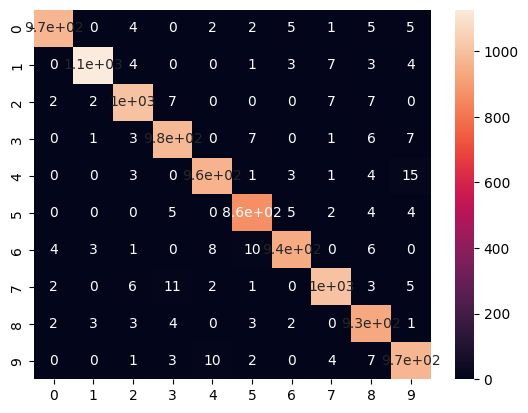

In [85]:
y_pred = np.array([np.argmax(i) for i in model1.predict(x_test)])
y_true = np.array([np.argmax(i) for i in y_test])
sns.heatmap(confusion_matrix(y_pred ,y_true),annot = True)
#trục tung là giá trị đúng ,trục hoành là đoán ra